In [71]:
import numpy as np
import sympy as sym
from numpy import math
import matplotlib.pyplot as plt


In [72]:
#Punto 1
##Iteral 1
def regla_producto_condicionada(esp_iniciales, cartas_restantes):
    

   
    P_esp_iniciales = 1.0
    for i in range(esp_iniciales):
        P_esp_iniciales*=(13-i)/(52-i)
      
        it=i 
        


    P_n_restantes = 1.0
    for j in range(1,cartas_restantes+1):
        
        P_n_restantes *= (13-it-j) / (52-it-j)
        

    
    return P_n_restantes
inciso_a=regla_producto_condicionada(2,3)
inciso_b=regla_producto_condicionada(3,2)
inciso_c=regla_producto_condicionada(4,1)
inciso_a
##Iteral 2



0.008418367346938776

0.22457

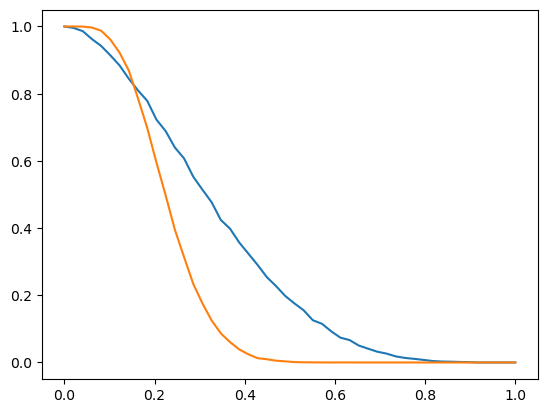

In [73]:

#Punto 2
##Inciso a)
x=np.linspace(0,1,50)
def prob_binomial(N,w,a,x):
    h=0
    prob=np.array([])
    
    for i in range(N):
        muestra=np.random.binomial(n=w,p=x[i],size=10000) 
        
        for j in range(10000):
            if muestra[j]<=a:
                h+=1
        prob=np.append(prob,(h/10000))
        h=0
    return prob

aceptacion_5=prob_binomial(50,5,1,x) 
aceptacion_25=prob_binomial(50,25,5,x)
plt.plot(x,aceptacion_5)
plt.plot(x,aceptacion_25)
plt.show
#Notemos que para p entre 0 y 0.3, la curva naranja está por encima, de modo que al comprador le sirve más el segundo plan
#Por otro lado, para el otro caso, la curva azul está por encima, de modo que al vendedor le sirve más el primer plan

##Inciso b)
####a)
def menor_n(N):
    menor = N + 1  
    for i in range(N + 1):
        proba_m = (np.exp(-1) * (1 ** i)) / math.factorial(i)

        if proba_m <= 0.01:
            menor = i
            break  

        

    return menor
menor_n=menor_n(50)
menor_n
###b)
def menor_h(N):
    menor = N + 1
    for h in range(N + 1):
        # Como queremos cero desconexiones, en la expresión de Poisson tendríamos x=0.
        # Y como lo queremos en h horas, entonces tomamos lambda=1/4 y lo multiplicamos por h.
        prob_cero_h = np.exp(-(h/4))
        if prob_cero_h <= 0.02:
            menor = h
            break 
    return menor
menor_cantidad_horas=menor_h(20)
menor_cantidad_horas
###c) 
#Notemos que la pregunta es de distribución de probabilidad bionomial. Es como responder, \
# De tres expreimentos con probabilidad p de ser exitosos, ¿cual es la probabilidad de que al menos uno lo sea?
poisson_cero=np.exp(-1)
def binomial (n,p,x):
    comb=math.factorial(n)/(math.factorial(x)*math.factorial(n-x))
    return comb*(p**x)*(1-p)**(n-x)
probabilidad_buscada=binomial(3,poisson_cero,1)
probabilidad_buscada
###d) 
def muestreo_poisson (N):
    muestreo=np.random.poisson(lam=N/4,size=100000) 
    contador=0
    for i in muestreo:
        if i==N/4:
            contador+=1
        probabilidad=contador/100000
    return probabilidad
proba=muestreo_poisson(12) 
proba




In [79]:
#Punto 3
##Iteral 2
###Inciso a)
x = sym.Symbol('x', real=True)
miu = 78
sigma = 6

def distribucion_normal(x, miu, sigma):
    return (1/(sigma*sym.sqrt(2*sym.pi))) * sym.exp(-((x-miu)**2)/(2*(sigma**2)))


integral_resultado_e = sym.integrate(distribucion_normal(x, miu, sigma), (x, 72, sym.oo))
integral_resultado=integral_resultado_e.evalf() 
integral_resultado

###Incisos b) y c)
#Asumamos que las notas van de 0 a 100

def contar_digitos_distintos_de_cero(numero):
    
    numero_str = str(numero)

   
    digitos_distintos_de_cero = [digito for digito in numero_str if digito != '0']


    cantidad = len(set(digitos_distintos_de_cero))

    return cantidad

def probabilidad_superior(y):
    return sym.integrate(distribucion_normal(x,miu,sigma), (x, y, sym.oo))

def hallar_limite(ptaje):
    n=contar_digitos_distintos_de_cero(ptaje)
    x_valores = np.linspace(78, 100, 1000)
    limite_calificacion = 100  

    for i in x_valores:
        prob = probabilidad_superior(i).evalf()
        print(prob)
        if round(prob, n) <= ptaje:
            limite_calificacion = i
            break  

    return limite_calificacion

buscado_b = hallar_limite(0.1)
buscado_c=hallar_limite(0.231)
(buscado_b,buscado_c) 



0.16287302649863*sqrt(2)


In [ ]:

uwu=np.random.poisson(lam=5,size=50) 